In [1]:
import argparse
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from colon3d.alg.tracks_loader import DetectionsTracker
from colon3d.util.data_util import SceneLoader
from colon3d.util.general_util import (
    create_empty_folder,
    save_video_from_frames_list,
)


In [2]:
load_scene_path = Path("/mnt/disk1/data/my_videos/Example_4")
save_scene_path = Path("/mnt/disk1/data/my_videos/Example_4_processed")
alg_fov_ratio = 0.8
n_frames_lim = 0

In [3]:
scene_loader = SceneLoader(
    scene_path=load_scene_path,
    n_frames_lim=n_frames_lim,
    alg_fov_ratio=alg_fov_ratio,
)

detections_tracker = DetectionsTracker(
    scene_path=load_scene_path,
    scene_loader=scene_loader,
)

Loading meta-data from /mnt/disk1/data/my_videos/Example_4/meta_data.yaml
Frames per second: 30
Original image size: 1225x966
Algorithm-view image size: 773x774
Using all 751 frames of the video...
Loaded detections from:  /mnt/disk1/data/my_videos/Example_4/Tracks.csv


Text(0, 0.5, 'Number of tracks')

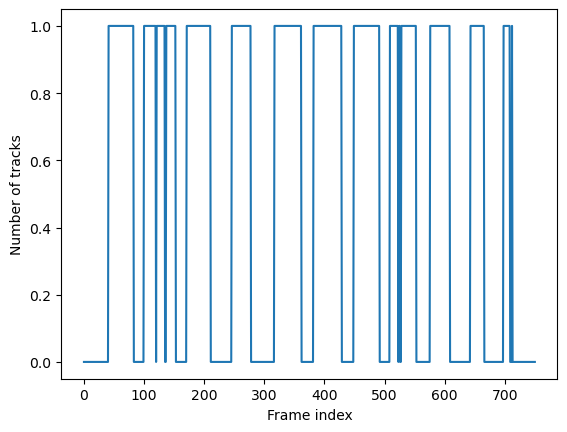

In [4]:

n_frames = scene_loader.n_frames

n_tracks_per_frame = np.zeros(n_frames)
for i_frame in range(n_frames):
    # Get the targets tracks in the current frame inside the algorithmic field of view
    tracks = detections_tracker.get_tracks_in_frame(i_frame, frame_type="alg_view")
    n_tracks_per_frame[i_frame] = len(tracks)
    


# plot the number of tracks per frame
plt.figure()
plt.plot(n_tracks_per_frame)
plt.xlabel("Frame index")
plt.ylabel("Number of tracks")



In [6]:

# loop over all frames and saved them as images

rgb_frames = []
fps = scene_loader.fps

# save the frames
frames_out_path = save_scene_path / "Frames"
create_empty_folder(frames_out_path, save_overwrite=False)

for i_frame in range(n_frames):
    print(f"i_frame={i_frame}/{n_frames}", end="\r", flush=True)
    im = scene_loader.get_frame_at_index(i_frame, frame_type="full")
    rgb_frames.append(im)

# save the video
save_video_from_frames_list(save_path=save_scene_path / "Video_New", frames=rgb_frames, fps=fps)


Saving video to /mnt/disk1/data/my_videos/Example_4_processed/Video_New.mp4...
Video saved to /mnt/disk1/data/my_videos/Example_4_processed/Video_New.mp4
